# Крупный интернет-магазин.
  

##### Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки.. 

  
#### `Задача:` Необходимо приоритизировать гипотезы, провести A/B-тест и проанализировать результаты.      

#### `Цель:`  Проанализировать A/B-тест, принять решение по результатам теста и объяснить его.
  
#### `Основные вопросы исследования:`  
  
- как изменилась приоритизация гипотез при применении RICE вместо ICE,  
- какие выводы и предположения можно сделать по построенным графикам,  
- какие выводы и предположения можно сделать по расчёту статистической значимости,  
- какое решение будет верным по результатам теста.  
  
#### `Данные:`  Проект состоит из 2 частей.  
  
- Часть 1. Приоритизация гипотез.  
- Часть 2. Анализ A/B-теста.   
  
#### `Описание данных:`

   ##### `Часть 1. Файл /datasets/hypothesis.csv:`  
  
`Hypothesis` — краткое описание гипотезы  
`Reach` —  охват пользователей по 10-балльной шкале  
`Impact` —  влияние на пользователей по 10-балльной шкале  
`Confidence` — уверенность в гипотезе по 10-балльной шкале   
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале  

   ##### `Часть 2. Файл /datasets/orders.csv:`  
   
`transactionId` —  идентификатор заказа  
`visitorId` — идентификатор пользователя, совершившего заказ  
`date` — дата, когда был совершён заказ  
`revenue` — выручка заказа  
`group` — группа A/B-теста, в которую попал заказ  
   
   ##### `Часть 2. Файл /datasets/visitors.csv:`  
   
`date` —  дата  
`group` —  группа A/B-теста  
`visitors` —  количество пользователей в указанную дату в указанной группе A/B-теста  
   
   
#### `Требования к исследованию:`
  
Подготовить данные  
  
Провести приоритизацию гипотез   
   
Верно интерпретировать графики   
  
Рассчитать статистическую значимость  
  
Сделать выводы по результатам A/B-теста  
  
Сформировать логичную структуру проекта  
  
Соблюсти структуру проекта и поддерживать аккуратность кода  
  
Сделать корректные выводы  

## Изучение общей информации.

### Загрузка данных и подготовка к анализу


**Пути к файлам**

- гипотезы: `/datasets/hypothesis.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/hypothesis.csv);
- заказы: `/datasets/orders.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders.csv);
- посетители: `/datasets/visitors.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visitors.csv).

### Получение данных

In [1]:
#импорт библиотек
import pandas as pd
import scipy.stats as stats
import datetime as dt
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import seaborn as sns
from scipy import stats as st

# не показывать предупреждения
from pandas.plotting import register_matplotlib_converters
import warnings
warnings.filterwarnings('ignore')

from termcolor import cprint # жирный шрифт

# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

pd.set_option('max_colwidth', None) # вывод всех символов в записях

In [2]:
# загрузка датасетов

try:
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # информация о 9 гипотезах по увеличению выручки интернет-магазина
    pd.read_csv('/datasets/orders.csv'),  # информация о заказах в период проведения теста
    pd.read_csv('/datasets/visitors.csv'),  # информация о пользователях по дням
)
except:
    hypothesis, orders, visitors = (
    pd.read_csv('https://code.s3.yandex.net//datasets/hypothesis.csv'),  
    pd.read_csv('https://code.s3.yandex.net//datasets/orders.csv'), 
    pd.read_csv('https://code.s3.yandex.net//datasets/visitors.csv'), 
)
sns.set()  

### Изучение данных

In [10]:
# функция для изучения данных
def df_analysis(df):
    print('_________________________________________________________________________________________________________')
    print(' ')
    cprint('Вывод 2 строк таблицы с начала и с конца с заголовками', 'green', attrs=['bold'])
    display(df.head(2), df.tail(2))
    print('_________________________________________________________________________________________________________')
    print(' ')
    cprint('Запрос всех атрибутов', 'green', attrs=['bold'])
    print(' ')
    print(df.info())
    print('_________________________________________________________________________________________________________')    
    print(' ')
    cprint('Числовое описание данных', 'green', attrs=['bold'])
    print(' ')
    print(df.describe().T.round(1))
    print('_________________________________________________________________________________________________________') 
    print(' ')
    cprint('Пропущенные значения', 'green', attrs=['bold'])
    print(' ')
    df_pass = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
    df_pass.columns = ['pass']
    df_pass['perc, %'] = (df_pass['pass']/len(df)*100).round(1) 
    print(df_pass) 
    print('_________________________________________________________________________________________________________')
    print(' ')
    cprint('Количество явных дубликатов', 'green', attrs=['bold'])
    print(' ')
    print(df.duplicated().sum())
    print('_________________________________________________________________________________________________________')
    print(' ')
    cprint('Общая обзорная гистограмма для столбцов с числовыми данными', 'green', attrs=['bold'])
    print(' ')
    df.hist(figsize=(10, 5))
    plt.show()
    print('_________________________________________________________________________________________________________')

#### Датафрейм 'hypothesis' 

_________________________________________________________________________________________________________
 
Вывод 2 строк таблицы с начала и с конца с заголовками


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10


,Hypothesis,Reach,Impact,Confidence,Efforts
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


_________________________________________________________________________________________________________
 
Запрос всех атрибутов
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
_________________________________________________________________________________________________________
 
Числовое описание данных
 
            count  mean  std  min  25%  50%  75%   max
Reach         9.0   4.8  3.2  1.0  3.0  3.0  8.0  10.0
Impact        9.0   4.8  3.2  1.0  3.0  3.0  7.0  10.0
Confidence    9.0   5.6  3.0  1.0  3.0  7.0  8.0   9.0
Efforts       9.0   4.9  2.8  1.0  3.0  5.0  6.0  10.0
__________________

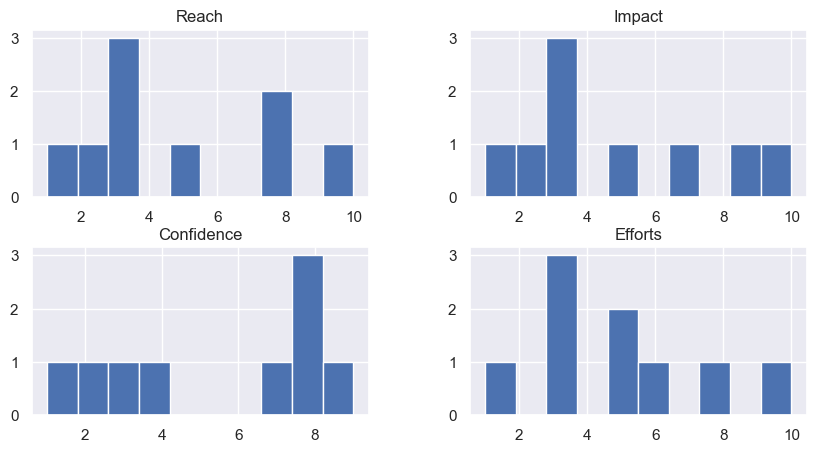

_________________________________________________________________________________________________________


In [11]:
df_analysis(hypothesis) # применение функции к нужному датафрейму

In [78]:
display(hypothesis.head(9)) # вывод всех строк таблицы с заголовками 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


**Вывод по hypothesis:**  
  
- заголовки необходимо привести к нижнему регистру
- исходя из имеющихся данных, доступна приоритизация способом ICE и RICE  
- оценка параметров по 10-ти балльной шкале
- компоненты:  
  **Reach** — скольких пользователей затронет изменение, которое нужно внести;  
  **Impact** — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;  
  **Confidence** — насколько вы уверены, что это изменение повлияет на пользователей именно так;  
  **Efforts** — стоимость тестирования гипотезы. 

#### Датафрейм 'orders' 

_________________________________________________________________________________________________________
 
Вывод 2 строк таблицы с начала и с конца с заголовками


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


,transactionId,visitorId,date,revenue,group
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


_________________________________________________________________________________________________________
 
Запрос всех атрибутов
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
_________________________________________________________________________________________________________
 
Числовое описание данных
 
                count          mean           std        min           25%  \
transactionId  1197.0  2.155621e+09  1.229085e+09  1062393.0  1.166776e+09   
visitorId      1197.0  2.165960e+09  1.236014e+09  5114589.0  1.111826e+09   
revenue        1197.0  8.348000e+03 

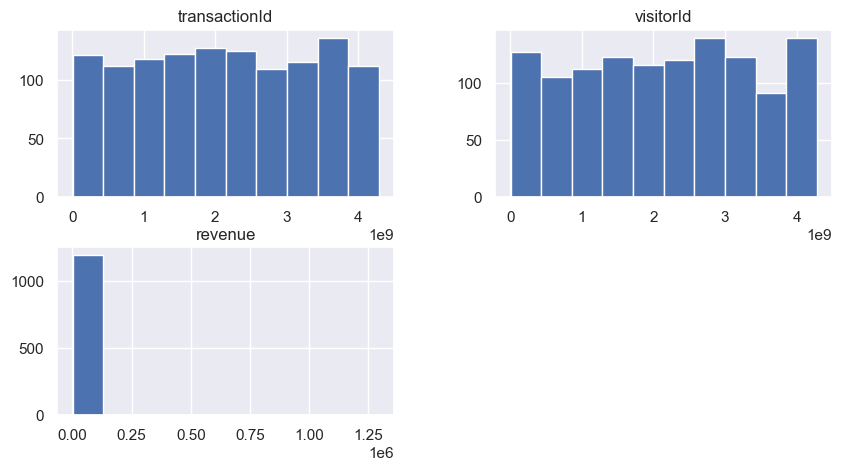

_________________________________________________________________________________________________________


In [7]:
df_analysis(orders) # применение функции к нужному датафрейму

**Вывод по orders:**  
  
- явные дубликаты отсутствуют
- пропущенные значения отсутствуют
- date преобразовать к формату datetime

#### Датафрейм 'visitors' 

_________________________________________________________________________________________________________
 
Вывод 2 строк таблицы с начала и с конца с заголовками


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


,date,group,visitors
60,2019-08-30,B,490
61,2019-08-31,B,718


_________________________________________________________________________________________________________
 
Запрос всех атрибутов
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
_________________________________________________________________________________________________________
 
Числовое описание данных
 
          count   mean    std    min    25%    50%    75%    max
visitors   62.0  607.3  114.4  361.0  534.0  624.5  710.5  770.0
_________________________________________________________________________________________________________
 
Пропущенные значения
 
          pass  perc, %
date         0      0.0
group        0      0.0
visitors     0      0.0
_____________________________

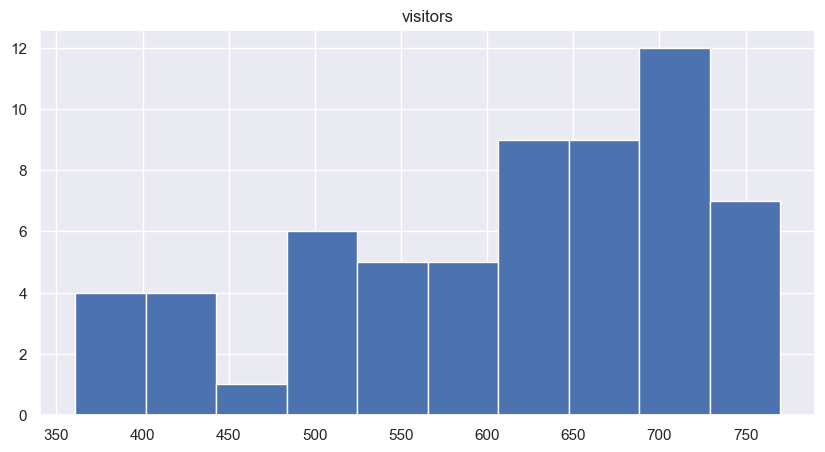

_________________________________________________________________________________________________________


In [12]:
df_analysis(visitors) # применение функции к нужному датафрейму

**Вывод по visitors:**  
  
- явные дубликаты отсутствуют
- пропущенные значения отсутствуют
- date преобразовать к формату datetime

### Подготовка данных.

In [88]:
hypothesis.columns = hypothesis.columns.str.lower()  # приведение к нижнему регистру
hypothesis.columns # список названий всех столбцов - проверка

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [89]:
# преобразование данных о времени
#orders['date'] = pd.to_datetime(orders['date'])
orders['date'] = orders['date'].astype("datetime64[ns]")
#visitors['date'] = pd.to_datetime(visitors['date'])
visitors['date'] = visitors['date'].astype("datetime64[ns]")

In [90]:
# проверка изменений
orders.info()
display(orders.head(1))
print()
visitors.info()
display(visitors.head(1))
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719


In [91]:
# сводка из таблиц по датам проведения теста
display('Заказы. Начальная дата {}, конечная дата {}'.format(orders['date'].min(), orders['date'].max()))
print('\nПосетители. Начальная дата {}, конечная дата {}\n'.format(visitors['date'].min(), visitors['date'].max()))

'Заказы. Начальная дата 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00'


Посетители. Начальная дата 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00



### Вывод по блоку: 
- Данные подготовлены к работе 
- Преобразованы форматы дат к datetime64[ns] 
- Временной период в таблицах представлен одинаковый
- Пропущенных значений нет  
- Дубликатов нет  

# Часть 1. Приоритизация гипотез.

## Применение структуры ICE для приоритизации гипотез.

In [92]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style.format({'ICE': '{:.1f}'})) 

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


## Применение структуры RICE для приоритизации гипотез.

In [93]:
hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [94]:
display(hypothesis.sort_values(by='RICE', ascending=False).style.format({'ICE': '{:.1f}', 'RICE': '{:.1f}'}))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


**Вывод:**  
  
- 7, 2, 0, 6, 8 - пятёрка лидеров одинакова при применении обоих способов;  
- **8 гипотеза. "Запустить акцию, дающую скидку на товар в день рождения"** с 1 места при  методе ICE уходит на 5 место по приоритету при RICE. Оценка Reach - 1, что справедливо. Сколько именинников окажется в период проведения эксперимента? А по стоимости трудозатрат имеет оценку 5, что нимало. Проверку данной гипотезы я бы не ставила в приоритет на короткий временной промежуток исследования.
- **6 гипотеза. "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"** 4 место при способе ICE, 3/4 при способе RICE. Охват - 5, усилия - 3, Impact - 3, Confidence - 8;  
- **0 гипотеза. "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"** 2 место при способе ICE, 3 при способе RICE. При этом Reach - 3, Efforts - 6, Impact - 10, Confidence - 8. Охват небольшой, трудозатраты существенные, а уверенность в том, как это повлияет на пользователей и насколько сильно - может быть оценено ошибочно;  
- **2 гипотеза. "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	"** 5 место при способе ICE, 2 при способе RICE. Reach - 8, что говорит о том, что охват существенный. Efforts - 3, стоимость усилий невысокая. Impact - 3, удовлетворённость пользователей может быть несущественным фактором, Confidence - 7, оценка, что влияние на пользователей пойдёт по плану, высокая;  
- **7 гипотеза. "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** 3 место при способе ICE, 1 при способе RICE. Reach - 10, охвачены будут все участники в данный период. Efforts - 5, это говорит о том, что реализация будет стоить усилий. Impact - 7. Confidence - 8. Будут ли email-рассылки иметь тот ожидаемый эффект, на который делается  ставка? Но иметь полную базу адресов важно.  
- **2, 0, 7, 6, 8** - в таком порядке я ставлю гипотезы по убыванию от самой приоритетной. Повышение трафика, увеличение конверсии и среднего чека - очень важные показатели для прибыльности бизнеса.


# Часть 2. Анализ A/B-теста.

## Анализ A/B-теста.

In [95]:
# группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
 
# id пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(group_intersections)

58

In [96]:
# удаление пользователей, попавших в обе группы
orders = orders.query('visitorId not in @group_intersections')

In [97]:
# проверка исправлений
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"') 
group_intersections=list(np.intersect1d(group_a['visitorId'], group_b['visitorId']))
len(group_intersections)

0

В обычных условиях пересекающихся пользователей стоит удалить, но в данном случае удаление произведено только из таблицы orders, в таблице visitors они остались и удалить оттуда пользователей невозможно (там нет id). 
Удаление пользователей, попавших в обе группы, для того, чтобы исключить искажение результата, т.к. тестирование направлено на то, чтобы оценить влияние внедряемых изменений в разных группах заказчиков. Выявить пересечение групп можно по ID пользователей, такие данные представлены только в таблице orders.

### Кумулятивная выручка по группам.

In [98]:
# создание df cumulativeData

# массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# объявление переменной ordersAggregated
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

# объявление переменной visitorsAggregated
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединение кумулятивных данных в одной таблице
cumulativeData =  ordersAggregated.merge(visitorsAggregated, 
                                         left_on=['date', 'group'], right_on=['date', 'group']) 

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(2), cumulativeData.tail(2))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713


,date,group,orders,buyers,revenue,visitors
60,2019-08-31,A,468,445,3364656,18736
61,2019-08-31,B,548,528,5068972,18916


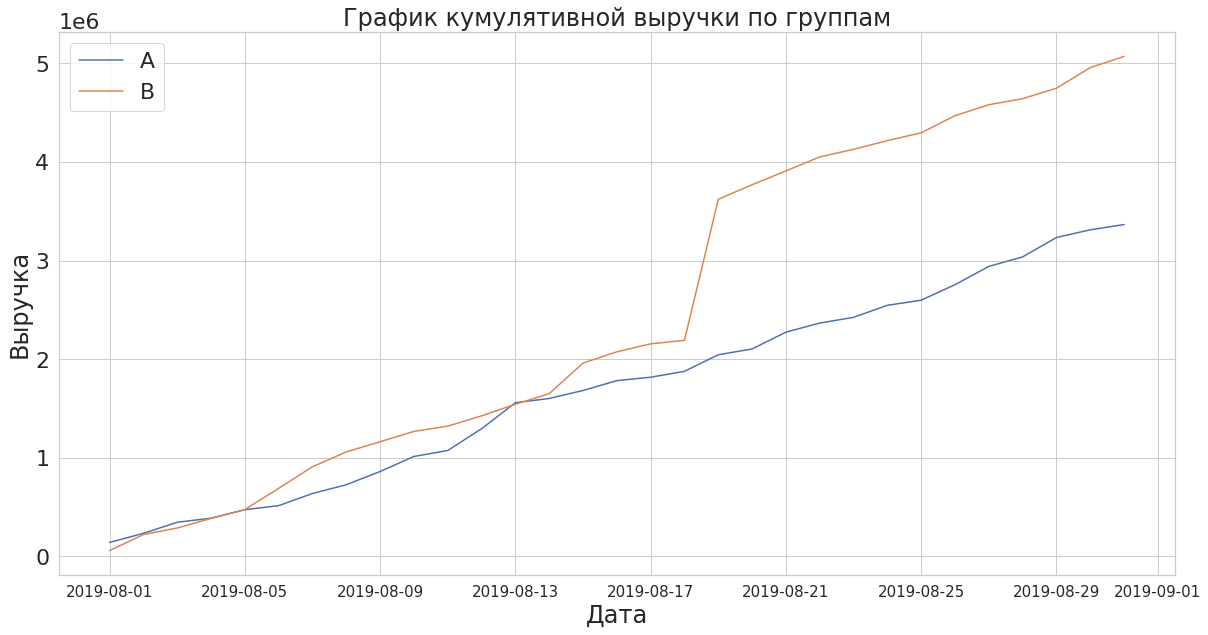

In [99]:
# объявление переменных cumulativeRevenueA и cumulativeRevenueB
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# параметры визуализации
sns.set(font_scale=2, style='whitegrid', rc={'figure.figsize':(20,10)})

# график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# размер шрифта по оси х
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()

Первые 5 дней графики выручки показывают почти одинаковый результат, далее группа В стабильно лучше по накопленным показателям, в середине месяца происходит скачок и до конца теста группа В лидирует.  
Такое резкое изменение графика может быть связано либо с дорогостоящими покупками, либо с большим числом покупок.  
Динамика роста в обоих группах к концу тестирования практически одинаковая.  
Окончательные выводы можно будеть сделать после обработки выброса.

### График кумулятивного среднего чека по группам.

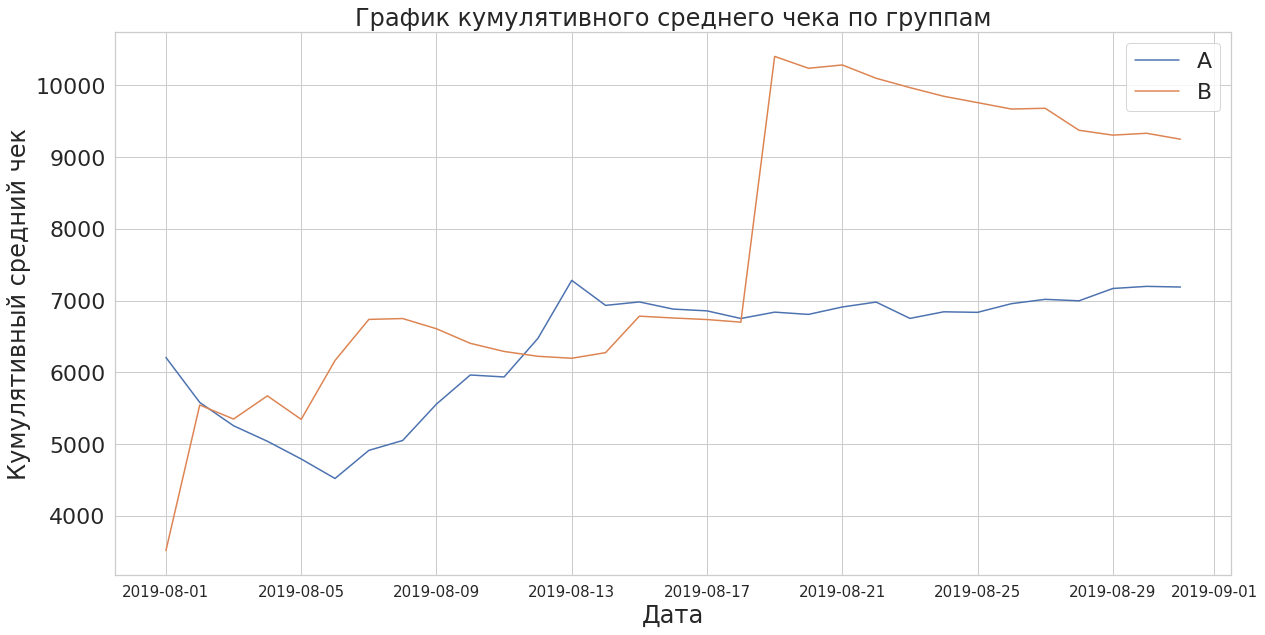

In [100]:
# график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.legend();

По среднему чеку график группы В в целом преобладает над группой А, также отмечается выброс в середине месяца.  
График группы А после середины месяца стабилен, у группы В тенденция к снижению, что, вероятно, обусловлено выбросом.

Text(0, 0.5, 'Кумулятивный cредний чек')

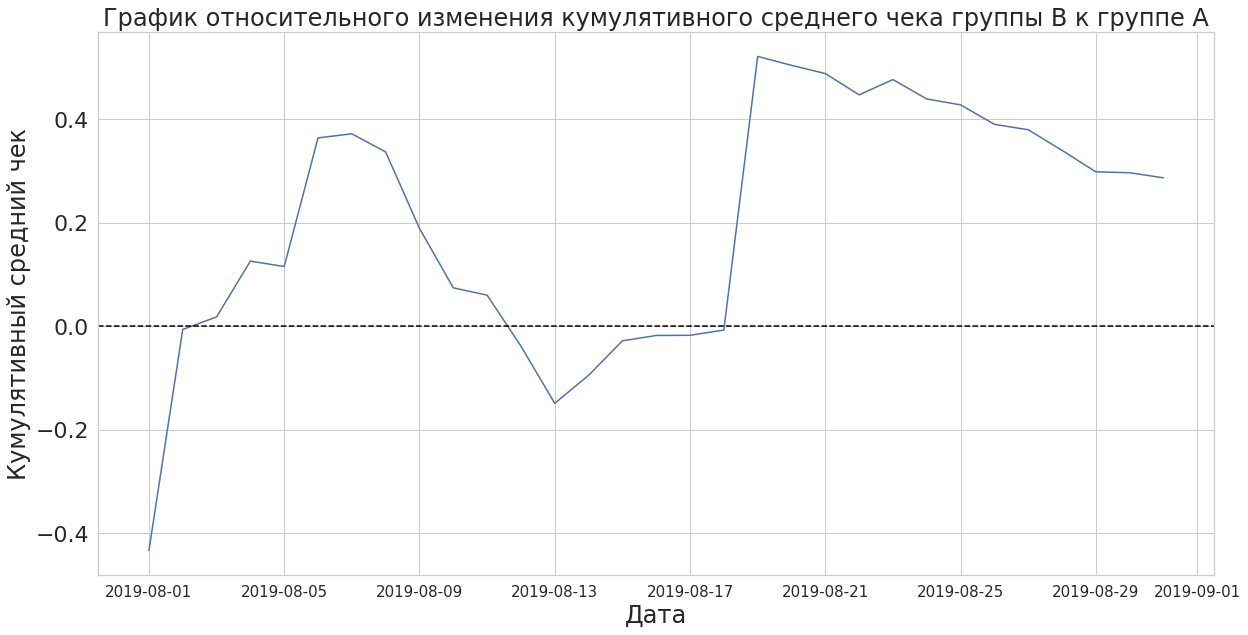

In [101]:
# относительное изменение кумулятивного среднего чека группы B к группе A
# объединение кумулятивных данных в одной таблице
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# сотношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# ось X
plt.axhline(y=0, color='black', linestyle='--')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')

Результаты теста значительно меняются в несколько дат.  
Также сохраняется аномалия в середине месяца.  
Первую неделю группа В преобладает над А, затем группа А показывала лучшие результаты, после выброса группа В вырвалась вперёд и сохранила лидерство до конца эксперимента с тенденцией к снижению своего результата.

### График кумулятивного среднего количества заказов на посетителя по группам. 

Text(0, 0.5, 'Кумулятивный показатель ср.кол-ва заказов')

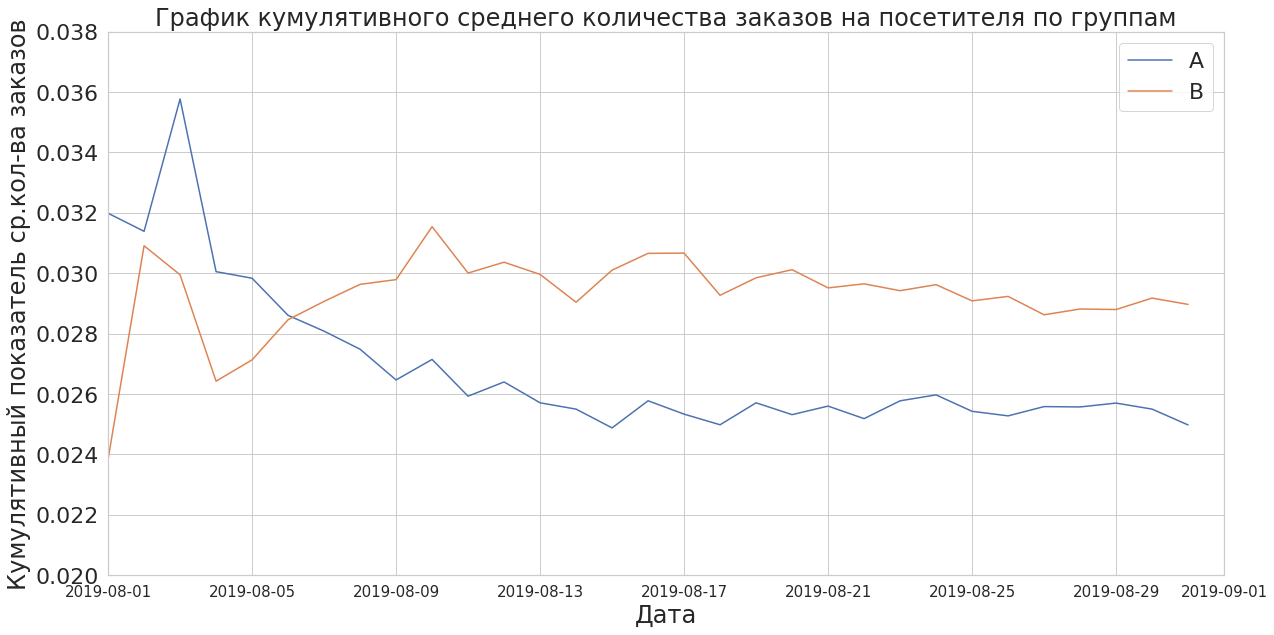

In [102]:
# кумулятивное среднее количество заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.020, 0.038])

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный показатель ср.кол-ва заказов')

В первую неделю **среднее количество заказов** группы А было выше, но потом группа В стала показывать стабильно лучший результат до конца тестирования.  
Нет никаких скачков в середине месяца, что говорит о том, что никаких аномалий по количеству заказов не происходило.  
***Среднее количество заказов*** у группы В стабильно лучше по накопленным показателям чем у A.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

Text(0, 0.5, 'Кумулятивный показатель ср.кол-ва заказов')

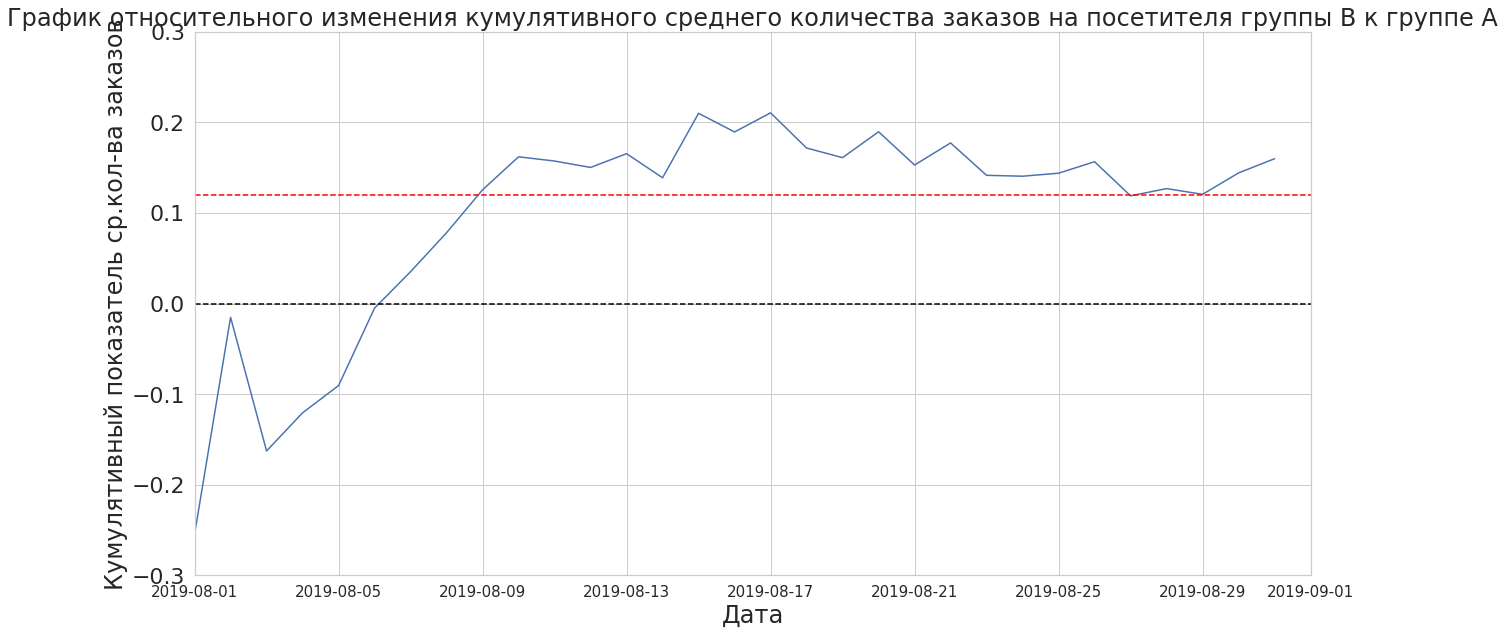

In [103]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='red', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3])

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный показатель ср.кол-ва заказов')

В начале первой недели наблюдаются колебания, после чего **среднее количество заказов** группы В показывает преобладающий результат.  
С 8 числа показатели стабильно выше 12%.

### Точечный график количества заказов по пользователям.

In [104]:
# df число заказов по пользователям, отсортированный по убыванию числа заказов 
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Text(0, 0.5, 'Количество заказов')

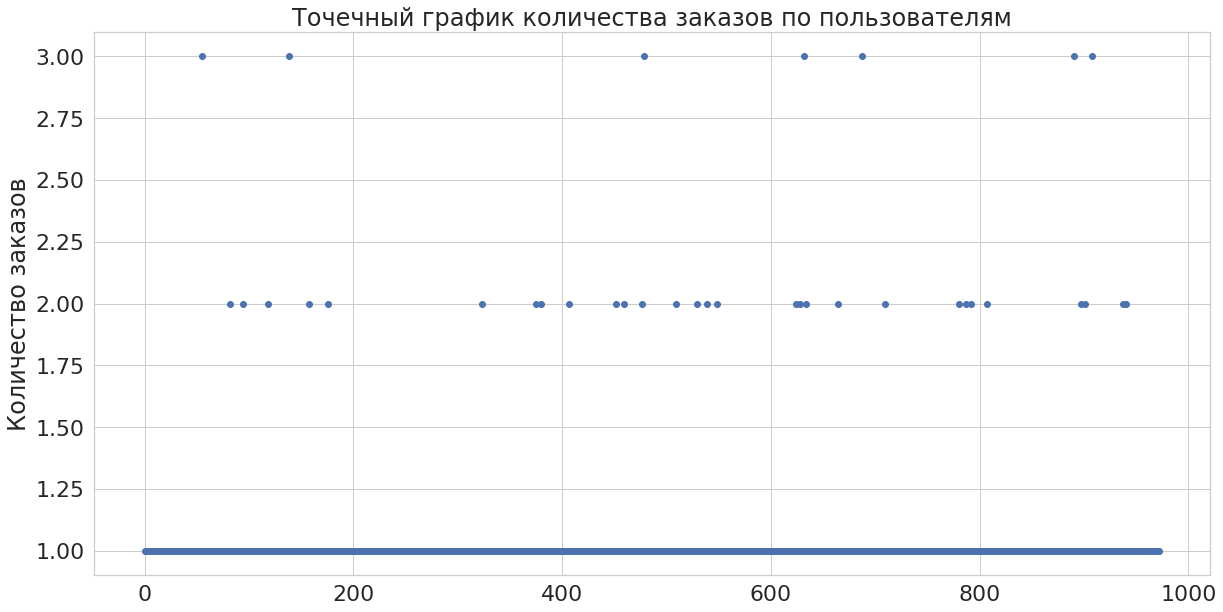

In [105]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')

Максимальное количество заказов - 3, их всего 7, в дальнейшем от них можно очистить данные.  
В основном в исследуемом периоде делали по 1 заказу, по 2 меньше. Точное соотношение можно выявить по перцентилям.

### 95-й и 99-й перцентили количества заказов на пользователя. Границы для определения аномальных пользователей.

In [106]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


Больше 2 заказов совершили не более 1% пользователей.  
Больше 1 заказа совершили не более 5% пользователей.  
Пользователей, сделавших более 2 заказов, будем считать аномальными.

### Точечный график стоимостей заказов.

In [107]:
# топ по стоимости заказов
orders.sort_values(by='revenue', ascending=False).head(10)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


Text(0, 0.5, 'Стоимость заказа в млн.')

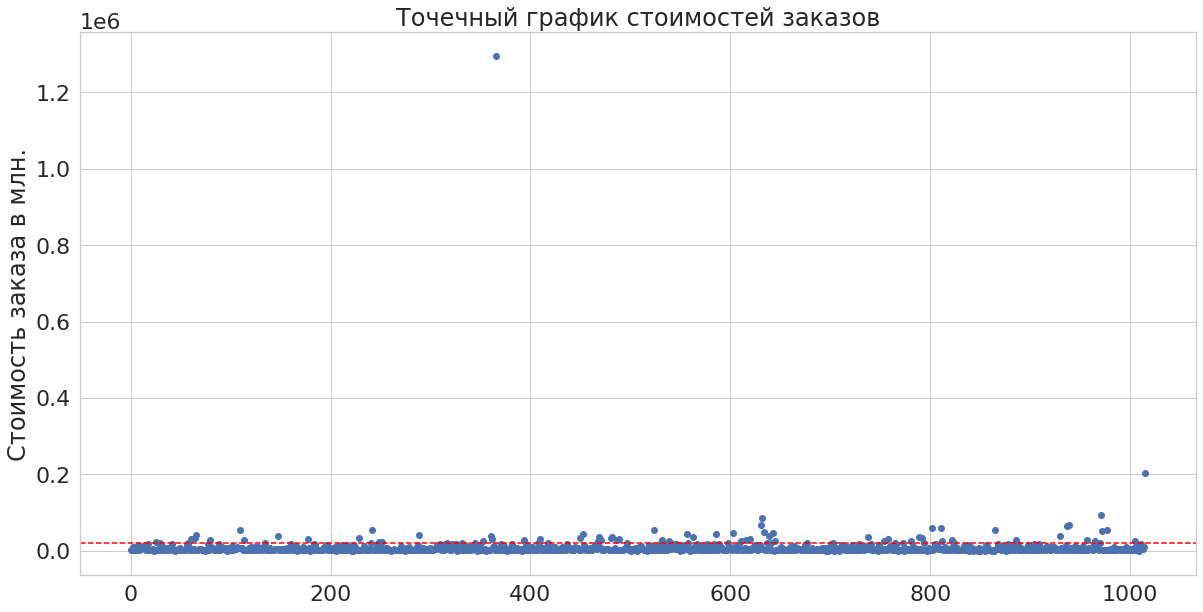

In [108]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.axhline(y=20000, color='red', linestyle='--')
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.')

На первый взгляд, основная масса заказов в диапазоне до 20 тыс.руб. Но есть аномальные заказы, особенно 2 (~ на 1,3 млн.руб и ~ 200 тыс.руб.)

### 95-й и 99-й перцентили стоимости заказов. Границы для определения аномальных заказов.

In [109]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


На сумму заказов более 53 904 руб совершили не более 1% пользователей.  
На сумму заказов более 26 785 руб совершили не более 5% пользователей.  
Заказы на сумму более 26 785 руб будем считать аномальными.

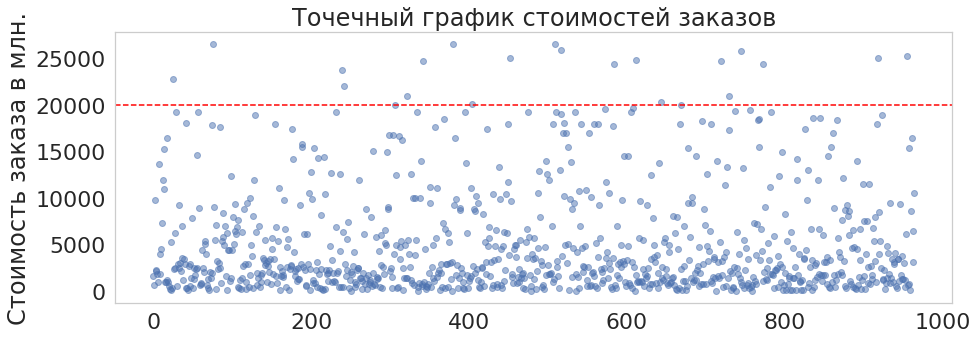

In [110]:
norm_orders = orders[orders['revenue']<=27000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн.')
plt.scatter(xn_values, norm_orders, alpha=0.5)
plt.axhline(y=20000, color='red', linestyle='--')

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Критический уровень статистической значимости α = **5%** (далее во всех расчётах)

In [111]:
alpha = 0.05

In [112]:
# подготовка данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

**date** — дата  
**ordersPerDateA** — количество заказов в выбранную дату в группе A  
**revenuePerDateA** — суммарная выручка в выбранную дату в группе A  
**ordersPerDateB** — количество заказов в выбранную дату в группе B  
**revenuePerDateB** — суммарная выручка в выбранную дату в группе B  
**ordersCummulativeA** — суммарное число заказов до выбранной даты включительно в группе A  
**revenueCummulativeA** — суммарная выручка до выбранной даты включительно в группе A  
**ordersCummulativeB** — суммарное количество заказов до выбранной даты включительно в группе B  
**revenueCummulativeB** — суммарная выручка до выбранной даты включительно в группе B  
**visitorsPerDateA** — количество пользователей в выбранную дату в группе A  
**visitorsPerDateB** — количество пользователей в выбранную дату в группе B  
**visitorsCummulativeA** — количество пользователей до выбранной даты включительно в группе A  
**visitorsCummulativeB** — количество пользователей до выбранной даты включительно в группе B  

In [113]:
# переменные, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 


In [131]:
# переменные, в которых пользователям с заказами будет соответствовать число заказов пользователя, 
# а пользователям без заказов — нули.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series
                     (0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                      name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series
                     (0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                      name='orders')],axis=0)

results = float('{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

**Нулевая гипотеза:** различий в среднем количестве заказов между группами нет.  
**Альтернативная гипотеза:** различия в среднем между группами есть.

In [146]:
# статистическая значимость различия среднего количества заказов по результатам теста. Тест Манна-Уитни. 
print('p-значение: ', results)

if results < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима, различия в среднем между группами есть.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

#  p-value для сравнения среднего между группами.
print('Относительный прирост в среднем количестве заказов: ', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].
                        sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-значение:  0.01102
Отвергаем нулевую гипотезу: разница статистически значима, различия в среднем между группами есть.
Относительный прирост в среднем количестве заказов:  0.160


**Вывод:**  
p-value < 0.05, это значит, что различия в среднем между группами есть, нулевая гипотеза отвергается.  
Относительный прирост среднего группы В к **среднему количеству** заказов группы А равен 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Нулевая гипотеза:** средние чеки групп A и B равны, статистически значимых отличий нет.  
**Альтернативная гипотеза:** средние чеки групп A и B различны, статистически значимые отличия есть.

In [137]:
results_1 = float('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                      orders[orders['group']=='B']['revenue'])[1]))
print('p-значение: ', results_1)

if results_1 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима, различия в среднем между группами есть.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.'
    )

print('Относительное различие в среднем чеке: ', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-значение:  0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
Относительное различие в среднем чеке:  0.287


**Вывод:**  
p-value > 0.05, это значит, что средние чеки групп A и B равны, статистически значимых отличий нет, нулевая гипотеза верна.  
Относительное различие среднего чека между сегментами примерно 29%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

In [ ]:
# предельные кол-во заказов и сумма покупки для формирования списка аномальных пользователей
limit_orders = 1
limit_revenue = 26785

In [138]:
# выявление аномальных пользователей 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > limit_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > limit_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > limit_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Кол-во аномальных пользователей: {}'.format(len(abnormalUsers)))
print(abnormalUsers.head(5))

Кол-во аномальных пользователей: 86
568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64


**Нулевая гипотеза:** **среднее количество заказов** групп A и B равны, статистически значимых отличий нет.  
**Альтернативная гипотеза:** **среднее количество заказов** групп A и B различны, статистически значимые отличия есть.

In [144]:
# очищенные данные о заказах, не включая аномальных пользователей 
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

results_2 = float('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

# p-value для сравнения среднего между очищенными группами
print('p-значение: ', results_2)

if results_2 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима, различия в среднем между группами есть.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.'
    )


# относительный прирост среднего очищенной группы B 
print('Относительный прирост среднего количества заказов: ', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-значение:  0.01593
Отвергаем нулевую гипотезу: разница статистически значима, различия в среднем между группами есть.
Относительный прирост среднего количества заказов:  0.174


**Вывод:**  
p-value < 0.05, это значит, что **среднее количество заказов** групп A и B различны, статистически значимые отличия есть, нулевая гипотеза отвергается.   
Относительный прирост среднего группы В к **среднему количеству заказов** группы А равен 17,4%, что больше на 1,4%, чем на "сырых" данных.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

**Нулевая гипотеза:** **показатели среднего чека** групп A и B равны, статистически значимых отличий нет.  
**Альтернативная гипотеза:** **показатели среднего чека**  групп A и B различны, статистически значимые отличия есть.

In [151]:
# статистическая значимость различия средних чеков после удаления аномальных пользователей
results_3 = float('{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(
                    orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B', np.logical_not(
                orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))

print('p-значение: ', results_3)

if results_3 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима, различия в среднем между группами есть.')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.'
    )


print('Относительное различие в среднем чеке: ', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-значение:  0.727
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
Относительное различие в среднем чеке:  -0.034


**Вывод:**  
p-value > 0.05, несмотря на то, что уменьшился почти на 0.1, нулевая гипотеза верна, статистически значимых отличий по-прежнему нет.  
Относительное различие среднего чека между сегментами превратилось с преобладания группы В в 29% на лидерство группы А с разницей с группой В в 3%. Это говорит о том, что аномальные выбросы в "сырых" данных исказили результат.

### Решение по результатам теста.

**Имеющиеся факты:**  
- Статистически значимое различие по **среднему количеству заказов** между группами есть, эта гипотеза подтверждается как по «сырым», так и по данным после фильтрации аномалий. Преимущество группы В составляет примерно 17%.  
- Нет статистически значимого различия по **среднему чеку** между группами ни по «сырым», ни по данным после фильтрации аномалий  
- График различия **среднего количества заказов** между группами сообщает, что результаты группы B лучше группы A, к концу тестирования результат стабилизирован, тенденции к дальнейшему изменению нет  
- График различия **среднего чека** говорит о том, что результаты группы B в целом преобладают над А, группа В сохранила лидерство до конца эксперимента, но это связано с аномальным "выбросом" в данных, поэтому дальнейший результат с тенденцией к снижению до результата группы А.


# Общий вывод.

Исходя из имеющихся фактов, тест следует остановить и признать его успешным.  
Продолжать смысла нет, потому как вероятность, что полученные данные по сегментам кардинально поменяются в следующий месяц, очень маловероятна.  
Проведение теста показало, что внедрённые изменения положительно повлияли на группу В, увеличив **среднеее количество заказов** в сравнении с группой А на 17%.